In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
temp = pd.read_csv("/content/drive/MyDrive/Minor Final/Dataset/Final_Dataset/Ginger.csv")

In [9]:
temp.drop('Commodity', axis=1, inplace=True)

In [10]:
temp.head()

,Date,Average
0,6/16/2013,145.0
1,6/17/2013,145.0
2,6/18/2013,145.0
3,6/19/2013,145.0
4,6/20/2013,145.0


In [ ]:
#Normalizing the average column
scaler = MinMaxScaler()
temp['Average'] = scaler.fit_transform(temp['Average'].values.reshape(-1, 1))

In [11]:
#converting date to datetime format and using date as index
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].dt.strftime('%m-%d-%Y')
temp.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

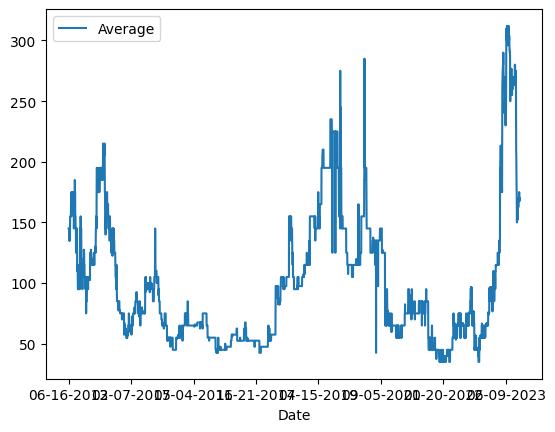

In [12]:
temp.plot()

In [13]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [14]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)

In [15]:
X1= np.squeeze(X1)
y1 = np.squeeze(y1)
# Print the new shapes
print(X1.shape, y1.shape)

(3607, 5) (3607,)


In [16]:
X_train1, y_train1 = X1[:2500], y1[:2500]
X_val1, y_val1 = X1[2500:3000], y1[2500:3000]
X_test1, y_test1 = X1[3000:], y1[3000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2500, 5), (2500,), (500, 5), (500,), (607, 5), (607,))

In [17]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError()]
)

In [19]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
79/79 [==============================] - 9s 75ms/step - loss: 12092.1484 - root_mean_squared_error: 109.9643 - mean_absolute_error: 98.7385 - val_loss: 4197.8149 - val_root_mean_squared_error: 64.7906 - val_mean_absolute_error: 61.2540
Epoch 2/100
79/79 [==============================] - 7s 93ms/step - loss: 10232.1523 - root_mean_squared_error: 101.1541 - mean_absolute_error: 88.8354 - val_loss: 2941.5742 - val_root_mean_squared_error: 54.2363 - val_mean_absolute_error: 49.9949
Epoch 3/100
79/79 [==============================] - 5s 66ms/step - loss: 8157.1655 - root_mean_squared_error: 90.3170 - mean_absolute_error: 76.3095 - val_loss: 1790.8005 - val_root_mean_squared_error: 42.3179 - val_mean_absolute_error: 36.7660
Epoch 4/100
79/79 [==============================] - 5s 61ms/step - loss: 6289.3760 - root_mean_squared_error: 79.3056 - mean_absolute_error: 62.9375 - val_loss: 972.3585 - val_root_mean_squared_error: 31.1827 - val_mean_absolute_error: 24.5578
Epoch 5/100
7

In [20]:
model1 = load_model('model1/')

In [ ]:
# model1 = load_model("/content/drive/MyDrive/Minro Final/LSTM_Finals model/LSTM_ginger_model.h5")

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

79/79 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,0.383259,0.361011
1,0.361851,0.397112
2,0.374436,0.361011
3,0.359074,0.361011
4,0.352039,0.361011
...,...,...
2495,0.383259,0.397112
2496,0.383259,0.397112
2497,0.383259,0.397112
2498,0.383259,0.397112


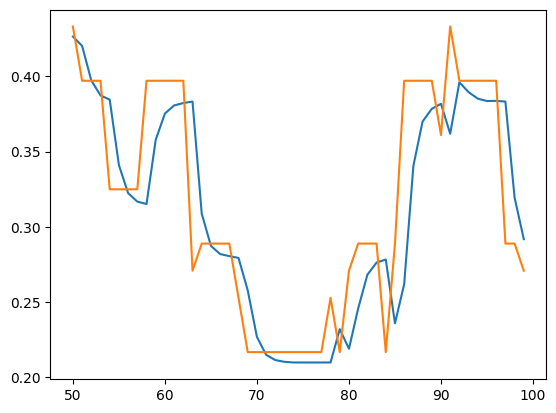

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results.tail()

16/16 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
495,0.003478,0.0
496,0.002080,0.0
497,0.002115,0.0
498,0.002140,0.0
499,0.002140,0.0


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results.tail(50)

19/19 [==============================] - 0s 4ms/step


,Test Predictions,Actuals
557,0.771826,0.830325
558,0.773273,0.826715
559,0.772994,0.826715
560,0.772716,0.824296
561,0.771981,0.830325
562,0.772767,0.826715
563,0.772833,0.830325
564,0.773530,0.830325
565,0.774252,0.830325
566,0.774757,0.826715


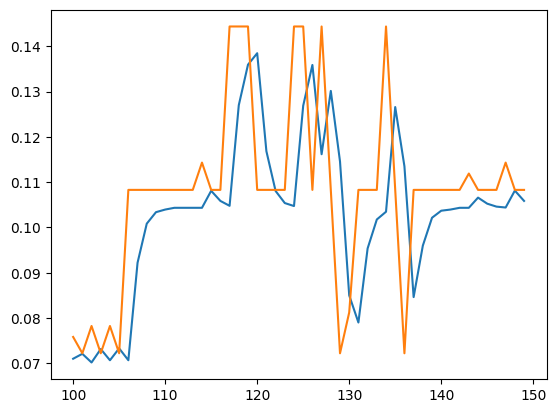

In [ ]:
plt.plot(test_results['Test Predictions'][100:150])
plt.plot(test_results['Actuals'][100:150])

In [ ]:
#TEST MSE,MAE and RMSC
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, test_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [ ]:
#Print MSE,MAE and RMSC
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.001793867852756514
Mean Absolute Error (MAE): 0.02514552728357063
Root Mean Squared Error (RMSE): 0.04235407716804268


In [ ]:
# Calculate R^2 score
r2score = r2_score(y_test1, test_predictions)

print("R^2 Score:", r2score)
accuracy_percentage = r2score * 100
print("Accuracy (R^2 Score) in Percentage:", accuracy_percentage)

R^2 Score: 0.9806350825298956
Accuracy (R^2 Score) in Percentage: 98.06350825298956


In [24]:
#code for without normalization
# future_steps = 100
# # Start with the last sequence from the test set
# current_sequence = y_test1[-5:]
# # current_sequence = X_test1[-20:]
# # Initialize an array to store the forecasted values
# forecasted_values = []

# # Iterate to predict future steps
# for i in range(future_steps):
#     # Predict the next value
#     next_value = model1.predict(np.expand_dims(current_sequence, axis=0))[0][0]

#     # Append the predicted value to the forecasted values
#     forecasted_values.append(next_value)

#     # Update the current sequence by removing the first element and adding the predicted value at the end
#     current_sequence = np.append(current_sequence[1:], next_value)

# # Print the forecasted values
# print("Forecasted Values for the next", future_steps, "steps:", forecasted_values)

1/1 [==============================] - 0s 32ms/step
Forecasted Values for the next 100 steps: [157.15723, 156.76144, 156.35089, 155.50052, 155.15466, 154.9498, 154.7333, 154.58795, 154.48344, 154.39658, 154.33, 154.27876, 154.23788, 154.20563, 154.18015, 154.15988, 154.14374, 154.13089, 154.12067, 154.11249, 154.10593, 154.10071, 154.0965, 154.09317, 154.09048, 154.08835, 154.08664, 154.08525, 154.08414, 154.08328, 154.08257, 154.082, 154.08154, 154.08118, 154.0809, 154.08067, 154.08047, 154.08034, 154.08022, 154.08011, 154.08002, 154.07997, 154.07991, 154.07988, 154.07985, 154.07983, 154.07982, 154.0798, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 154.07979, 15

In [22]:
future_steps = 10
# Start with the last sequence from the test set
# current_sequence = [0.48736462 ,0.48736462 ,0.50541516 ,0.48736462 ,0.47833935]
# current_sequence = X_test1[-20:]
# Initialize an array to store the forecasted values
forecasted_values = []

# Iterate to predict future steps
for i in range(future_steps):
    # Predict the next value
    next_value_normalized = model1.predict(np.expand_dims(current_sequence, axis=0))[0][0]

    # Denormalize the predicted value
    next_value = scaler.inverse_transform([[next_value_normalized]])[0][0]

    # Append the denormalized predicted value to the forecasted values
    forecasted_values.append(next_value)

    # Update the current sequence by removing the first element and adding the predicted value at the end
    current_sequence = np.append(current_sequence[1:], next_value_normalized)

# Print the forecasted values
print("Forecasted Values for the next", future_steps, "steps:", forecasted_values)

1/1 [==============================] - 0s 24ms/step


NameError: name 'next_value' is not defined

In [ ]:
print(current_sequence)

[0.48736462 0.48736462 0.50541516 0.48736462 0.47833935]


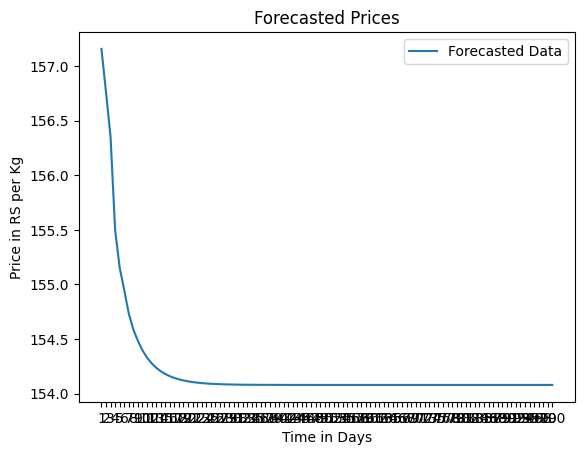

In [25]:
# Plot forecasted values
plt.plot(range(1, future_steps + 1), forecasted_values, label='Forecasted Data')

# Set labels and title
plt.xlabel('Time in Days')
plt.ylabel('Price in RS per Kg')
plt.title('Forecasted Prices')
plt.legend()

# Set x-axis ticks to show 1, 2, 3, ..., future_steps
plt.xticks(range(1, future_steps + 1))

# Show plot
plt.show()